# Examples

In [9]:
%pip install pandas; numpy; matplotlib; scipy

  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp311-cp311-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.

In [1]:
import numpy as np
from bayes_estimation import BayesRisk, bhattacharyya_error_bound, decision_boundary
import matplotlib.pyplot as plt

## Bayes Risk Function

For a one dimensional 2-class problem with 2 actions a1, a2 (a1: choose ω1; a2 choose ω2),  
where N(µ, σ^2) is Normal distribution, and µ is mean and σ^2 is variance, given:
- prior probability: P(ω1) = 3/5, P(ω2) = 2/5
- class conditional densities: p(x|ω1) ~ N(0, 1) and p(x|ω2) ~ N(2, 4)


If x = 5.0:

Class likelihood:
Class 1, N(0, 1) = 1.49e-06
Class 2, N(2, 4) = 6.48e-02

Likelihood ratio = 2.30e-05

Evidence = 2.59e-02

Class posterior probability:
Class 1, N(0, 1) = 3.4e-05

Total risk = 8e+07



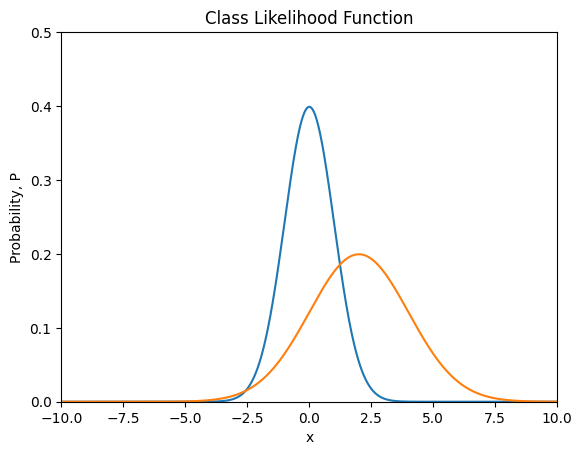

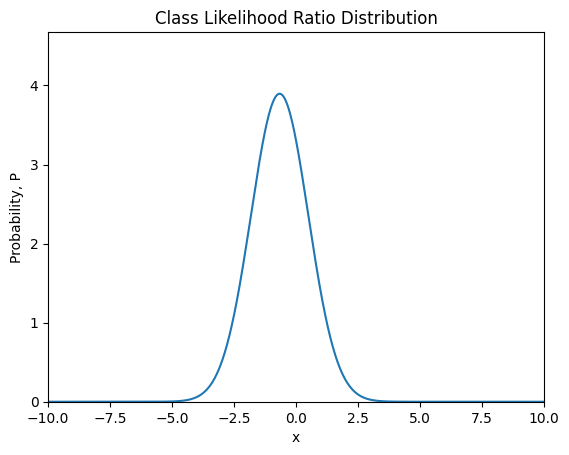

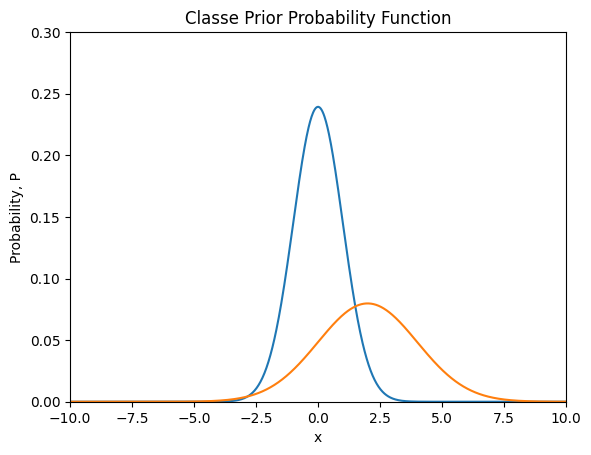

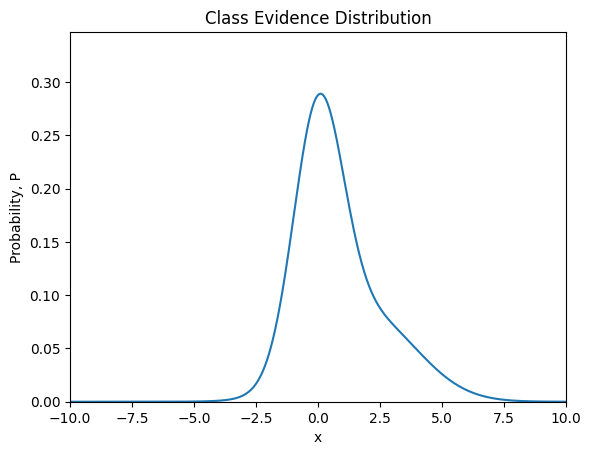

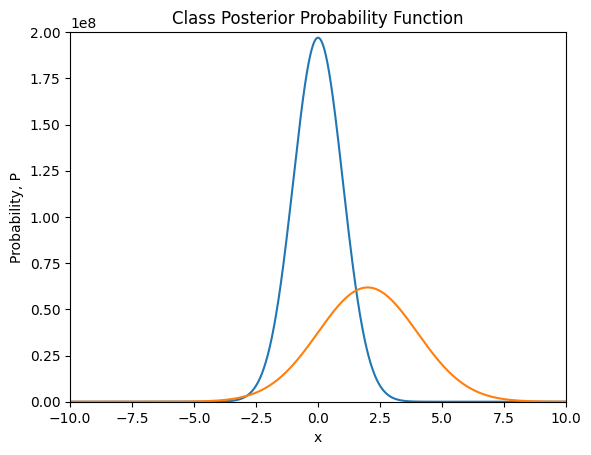

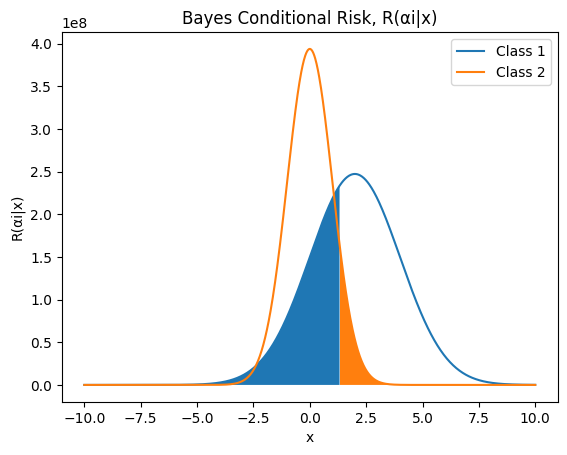

In [2]:

legends = ["Class 1", "Class 2"]
x = np.linspace(-10, 10, 1001)
P = [3/5, 2/5]                          # prior probabilities
N = [(0, 1), (2, 4)]                    # class conditional densities
risk_matrix = [[0,4],                   # example 2x2 risk matrix
               [2,0]]

## all classes ##
# init bayes risk obj
br = BayesRisk(x, N, P)
df = br.bayes_risk_df(risk_matrix)

## single point ##
x_i = 5.0
br_point = BayesRisk([x_i], N, P)

print(f"\nIf x = {x_i}:")

print(f'\nClass likelihood:')
for i, likelihood in enumerate(br_point.likelihood):
    print(f'Class {i+1}, N{N[i]} = {likelihood[0]:.2e}')

print(f'\nLikelihood ratio = {br_point.likelihood_ratio[0]:.2e}')

print(f'\nEvidence = {br_point.evidence[0]:.2e}')

print(f'\nClass posterior probability:')                            # TODO somethings up here
for i, posterior in enumerate(br_point.posterior):
    print(f'Class {i+1}, N{N[i]} = {posterior[0]:.2}')

print(f'\nTotal risk = {df.loc[x_i].sum():.2}\n')

# plot class likelihood, evidence distribution, prior/posterior probability distributions
data = [
    (br.likelihood, "Class Likelihood Function", (0, 0.5), []),
    (br.likelihood_ratio, "Class Likelihood Ratio Distribution", (0, max(br.likelihood_ratio)*1.2), []),
    (br.prior, "Classe Prior Probability Function", (0, 0.3), []),
    (br.evidence, "Class Evidence Distribution", (0, max(br.evidence)*1.2), []),
    (br.posterior, "Class Posterior Probability Function", (0, 2e8), []),
]
for d in data:
    vec, title, ylim, legend = d
    # print(br.x, vec)
    # plt.plot(br.x, vec)
    br.plot_data(data_vector=vec, title=title, ylim=ylim, legends=legend)
br.plot_bayes_risk_threshold(risk_matrix, legends=legends)
plt.show()


In [8]:
f = [1,2,3,4]
list(zip(f[::2], f[1::2]))

[(1, 2), (3, 4)]

## Decision Boundary

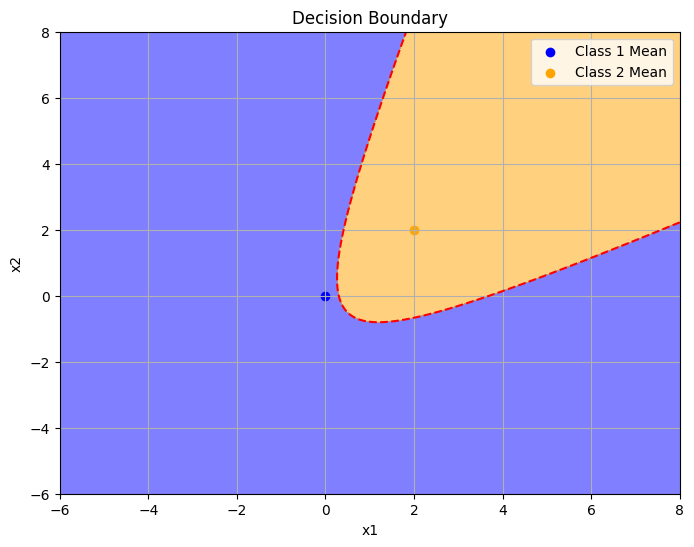


Bhattacharyya error bound: P(error) <= 0.2198


In [2]:

P = [0.25, 0.75]
mu = [np.array([0, 0]),
      np.array([2, 2])]
sigma = [np.array([[1, 0], [0, 2]]),
         np.array([[1, 1], [1, 2]])]

# decision boundary function
boundary_func = decision_boundary(mu, sigma, P, plot=True)

# Bhattacharyya error bound
P_error = bhattacharyya_error_bound(mu, sigma, P)
